<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/GACR_Regresion_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Analytics Customer Revenue

In [142]:
# librerias
# gestión de datos
import numpy as np
import pandas as pd

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#libreria estadistica
from scipy import stats
from datetime import datetime

from google.colab import files
from scipy.stats import chi2_contingency







In [3]:
#Conexion
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#leemos el fichero IMDB
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejercicios/df_regression_1023.csv")
# Cargar archivo CSV como DataFrame ver los 5 primero registros
df.head(5)

Mounted at /content/drive


<ipython-input-3-9dda76c4b8d8>:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejercicios/df_regression_1023.csv")


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,channelGrouping,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,...,geoNetwork.country,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.bounces,totals.newVisits,totals.transactionRevenue
0,0,0,1,Organic Search,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,...,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,NaN
1,1,1,2,Organic Search,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,...,Spain,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,NaN
2,2,2,3,Organic Search,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,...,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,NaN
3,3,3,7,Organic Search,537222803633850821,537222803633850821_1472812602,Not Socially Engaged,1472812602,1,1472812602,...,Australia,not available in demo dataset,bigpond.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,NaN
4,4,4,9,Organic Search,9499785259412240342,9499785259412240342_1472812272,Not Socially Engaged,1472812272,1,1472812272,...,Netherlands,not available in demo dataset,chello.nl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,NaN


# Data Understanding

In [4]:
#Tamaño de Dataset
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270850 entries, 0 to 270849
Columns: 37 entries, Unnamed: 0.2 to totals.transactionRevenue
dtypes: bool(1), float64(3), int64(7), object(26)
memory usage: 74.6+ MB


In [5]:
df.head().T

,0,1,2,3,4
Unnamed: 0.2,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
Unnamed: 0,1,2,3,7,9
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
fullVisitorId,377306020877927890,3895546263509774583,4763447161404445595,537222803633850821,9499785259412240342
sessionId,377306020877927890_1472880147,3895546263509774583_1472865386,4763447161404445595_1472881213,537222803633850821_1472812602,9499785259412240342_1472812272
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
visitId,1472880147,1472865386,1472881213,1472812602,1472812272
visitNumber,1,1,1,1,1
visitStartTime,1472880147,1472865386,1472881213,1472812602,1472812272


In [6]:
df=df.loc[:,~df.columns.str.contains('Unnamed')].copy()
#Quitar todas estas Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0
df.head(2).T

,0,1
channelGrouping,Organic Search,Organic Search
fullVisitorId,377306020877927890,3895546263509774583
sessionId,377306020877927890_1472880147,3895546263509774583_1472865386
socialEngagementType,Not Socially Engaged,Not Socially Engaged
visitId,1472880147,1472865386
visitNumber,1,1
visitStartTime,1472880147,1472865386
device.browser,Firefox,Chrome
device.browserVersion,not available in demo dataset,not available in demo dataset
device.browserSize,not available in demo dataset,not available in demo dataset


In [7]:
#Tratamiento id. borramos info redundandan
df_ids=['fullVisitorId', 'visitId']


In [8]:
# Eliminar las columnas
df.drop(df_ids, axis=1, inplace=True)

In [9]:
TARGET = 'totals.transactionRevenue'

Tipo de Atributos

In [10]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
visitNumber,270850.0,2.243275e+00,8.912507e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.930000e+02
visitStartTime,270850.0,1.485001e+09,9.014480e+06,1.470035e+09,1.477564e+09,1.483927e+09,1.492743e+09,1.501657e+09
totals.visits,270850.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.bounces,135326.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.newVisits,210508.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.transactionRevenue,3427.0,1.382343e+08,5.648006e+08,4.000000e+04,2.448500e+07,4.822000e+07,1.059300e+08,2.312950e+10


In [11]:
#bounces tiene 0 desviacion, pero tiene nulos --> buleana de nulo o no nulo, mismo con newVisits

In [12]:
df.describe(exclude=np.number).T
#Todas las q tienen una unique	 no nos vale, no aportan valor

,count,unique,top,freq
channelGrouping,270850,8,Organic Search,114313
sessionId,270850,270774,4491333099755680268_1476946205,2
socialEngagementType,270850,1,Not Socially Engaged,270850
device.browser,270850,37,Chrome,186001
device.browserVersion,270850,1,not available in demo dataset,270850
device.browserSize,270850,1,not available in demo dataset,270850
device.operatingSystemVersion,270850,1,not available in demo dataset,270850
device.isMobile,270850,2,False,199280
device.mobileDeviceBranding,270850,1,not available in demo dataset,270850
device.mobileDeviceModel,270850,1,not available in demo dataset,270850


Eliminar variables con poca o nula varianza

In [13]:
df['device.screenResolution'].nunique(dropna=False)

1

In [14]:
#Funcion q diga todas las q tiene un solo unique
constant_columns =[column for column in df.columns if df[column].nunique(dropna=False)==1]
#hago la lista, reviso veo q esta correcto y despues elimino
df.drop(constant_columns, axis=1, inplace=True)

In [15]:
df_description=df.describe(include='all').T

Analisis del Target

In [16]:
df[TARGET].head()
#si hay nulos no sirve, los nulos en realidad son 0, donde no ha habido compra.

,totals.transactionRevenue
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [17]:
df[df[TARGET].notnull()].describe().T
#Los nulos son en realidad sin compra no son nulos reales.

,count,mean,std,min,25%,50%,75%,max
visitNumber,3427.0,4.327400e+00,1.445595e+01,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,3.150000e+02
visitStartTime,3427.0,1.485799e+09,9.252084e+06,1.470057e+09,1.478101e+09,1.485458e+09,1.493851e+09,1.501631e+09
totals.bounces,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totals.newVisits,1330.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.transactionRevenue,3427.0,1.382343e+08,5.648006e+08,4.000000e+04,2.448500e+07,4.822000e+07,1.059300e+08,2.312950e+10


In [18]:
df[df[TARGET].notnull()][TARGET]
#traes muxos 0 q no son reales. los datos de google vienen con *100000

,totals.transactionRevenue
259,8380000.0
277,81500000.0
288,63840000.0
289,43710000.0
295,35390000.0
...,...
270715,135920000.0
270720,23180000.0
270724,22970000.0
270731,12990000.0


In [19]:
df[TARGET]=df[TARGET].astype(float)

In [20]:
df[TARGET].describe()


,totals.transactionRevenue
count,3.427000e+03
mean,1.382343e+08
std,5.648006e+08
min,4.000000e+04
25%,2.448500e+07
50%,4.822000e+07
75%,1.059300e+08
max,2.312950e+10


In [22]:
# Rellenar los valores faltantes en la columna objetivo con 0
df[TARGET].fillna(0, inplace=True)

<ipython-input-22-784a875ce1e5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[TARGET].fillna(0, inplace=True)


In [23]:
df[TARGET].describe()

,totals.transactionRevenue
count,2.708500e+05
mean,1.749045e+06
std,6.537418e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.312950e+10


In [ ]:
# q el pct 75= pct 50 pct 25 min, me indica q la distribucion es separada a la izquierda

In [24]:

df[TARGET]=df[TARGET]/100000

In [25]:
df[df[TARGET]>0][TARGET].describe()

,totals.transactionRevenue
count,3427.000000
mean,1382.342924
std,5648.005901
min,0.400000
25%,244.850000
50%,482.200000
75%,1059.300000
max,231295.000000


In [26]:
df['visitWithTransaction']=(df[TARGET]>0).astype(int)

In [28]:
df['visitWithTransaction'].mean()*100
#la cantidad q terminan el compar

1.2652759830164297

<ipython-input-36-49f96d6a8e7a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['visitWithTransaction']==1] [TARGET], fit=stats.norm)


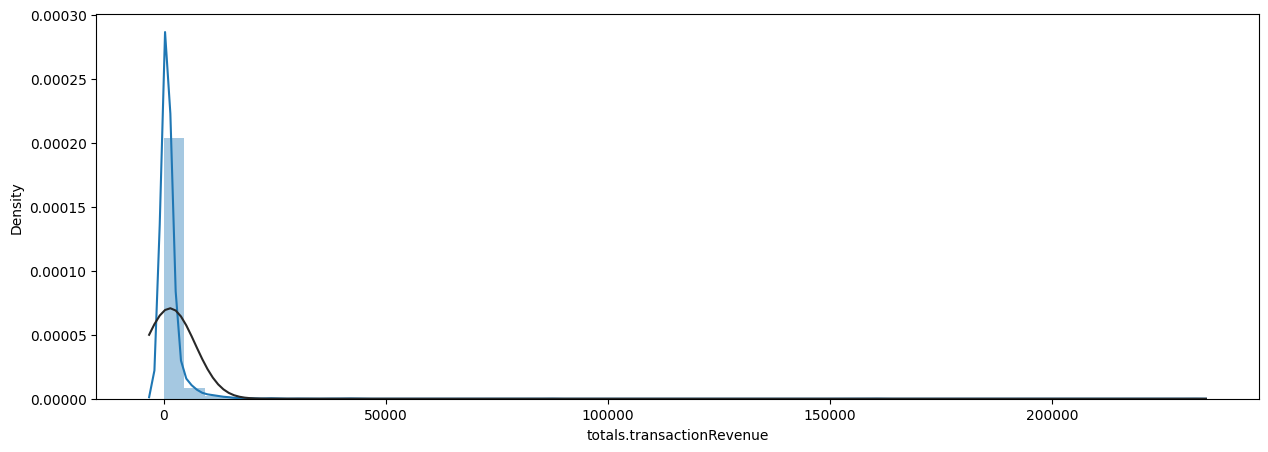

In [36]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['visitWithTransaction']==1] [TARGET], fit=stats.norm)
plt.show()

El TARGET no es normal puede tener outlier y me interesa q no esten. Porq voy a usar una tegresion lineal. Por lo tnato voy a usar transformacion logaritmica

In [38]:
df['totals.transactionRevenue'].head()

,totals.transactionRevenue
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


La función np.log1p se utiliza comúnmente en el preprocesamiento de datos para la regresión, especialmente cuando la variable objetivo (en este caso, los ingresos por transacción) tiene las siguientes características

In [37]:
df['totals.transactionRevenue']=df[TARGET].apply(np.log1p)
# Aplicar la transformación log1p

In [44]:
df['totals.transactionRevenue_log'] = df[TARGET].apply(np.log1p)
TARGET_LOG = 'totals.transactionRevenue_log'

<ipython-input-45-bc322c52fd40>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[TARGET_LOG])  # Usa TARGET, no TARGET_LOG


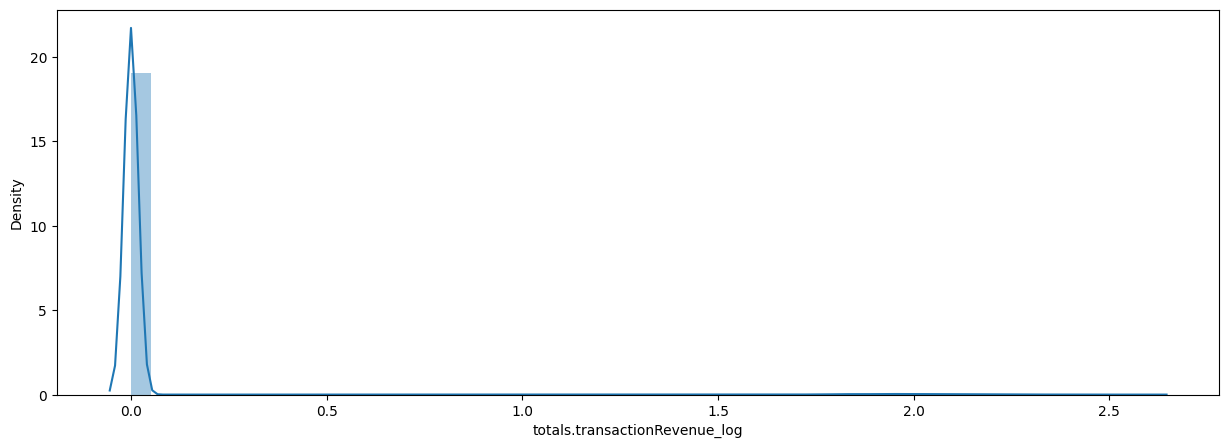

In [45]:
plt.figure(figsize=(15, 5))
sns.distplot(df[TARGET_LOG])  # Usa TARGET, no TARGET_LOG
plt.show()

<ipython-input-46-3a63aed13a85>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['visitWithTransaction']==1] [TARGET_LOG], fit=stats.norm)


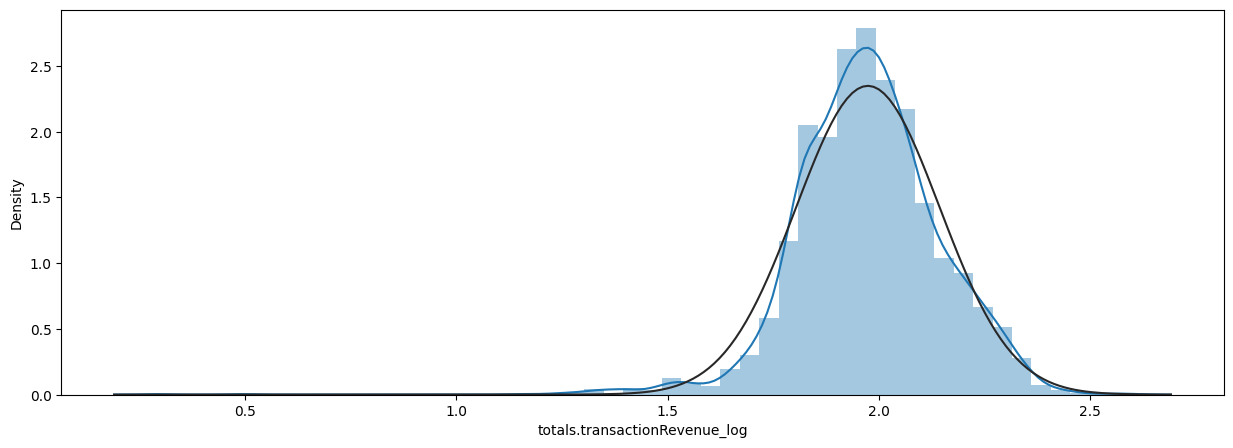

In [46]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['visitWithTransaction']==1] [TARGET_LOG], fit=stats.norm)
plt.show()

Analisis de Variables

In [50]:
df_description.to_csv('df_description.csv')
files.download('df_description.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Analisis de variables categoricas

In [62]:
# Analisis de variables categoricas
df['device.browser'].describe()

,device.browser
count,270850
unique,37
top,Chrome
freq,186001


One-Hot Encoding se usa preferiblemente cuando tienes un número relativamente pequeño de categorías

usamos navegador poco comun true o false

In [63]:
# Obtener los 4 navegadores principales
top_browsers = df['device.browser'].value_counts().head(4)

In [64]:
# Convertir el índice (nombres de los navegadores) a una lista
top_browsers_list = top_browsers.index.tolist()

In [65]:
top_browsers_list.append('Others')

In [66]:
top_browsers_list

['Chrome', 'Safari', 'Firefox', 'Internet Explorer', 'Others']

In [69]:
df['device.browser']=pd.Categorical(df['device.browser'], categories=top_browsers_list, )
#categorigal lista predefinida

In [71]:
df['device.browser'].value_counts(dropna=False)

,count
device.browser,
Chrome,186001
Safari,54676
NaN,13283
Firefox,11052
Internet Explorer,5838
Others,0


In [88]:
#df['device.browser'].fillna('Others', inplace=True)
df.fillna({'device.browser': 'Others'}, inplace=True)

Analisis propio de Browser

In [89]:
df['device.browser'].value_counts(normalize=True, dropna=False)

,proportion
device.browser,
Chrome,0.686731
Safari,0.201868
Others,0.049042
Firefox,0.040805
Internet Explorer,0.021554


In [103]:
df[df['visitWithTransaction'] == 1].pivot_table(index='device.browser', values=TARGET_LOG, aggfunc=[len, 'mean'],observed=False )

,len,mean
,totals.transactionRevenue_log,totals.transactionRevenue_log
device.browser,,
Chrome,3086,1.981724
Safari,232,1.898435
Firefox,52,1.957031
Internet Explorer,29,1.907787
Others,28,1.885800


In [104]:
_results_df=df[df['visitWithTransaction'] == 1].pivot_table(index='device.browser', values=TARGET, aggfunc=[len, np.mean])

<ipython-input-104-4a934f1300cc>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  _results_df=df[df['visitWithTransaction'] == 1].pivot_table(index='device.browser', values=TARGET, aggfunc=[len, np.mean])
<ipython-input-104-4a934f1300cc>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  _results_df=df[df['visitWithTransaction'] == 1].pivot_table(index='device.browser', values=TARGET, aggfunc=[len, np.mean])
<ipython-input-104-4a934f1300cc>:1: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the str

In [105]:
_results_df.columns=['transactions','mean_revenue_log']

In [106]:
_results_df['n_rows']=df['device.browser'].value_counts(dropna=False)

In [107]:
_results_df['pct_rows']=df['device.browser'].value_counts(normalize=True, dropna=False)

In [108]:
_results_df

,transactions,mean_revenue_log,n_rows,pct_rows
device.browser,,,,
Chrome,3086,6.353450,186001,0.686731
Safari,232,5.770264,54676,0.201868
Firefox,52,6.304097,11052,0.040805
Internet Explorer,29,5.806358,5838,0.021554
Others,28,5.687636,13283,0.049042


In [109]:
_results_df['pct_transactions']=_results_df['transactions']/ _results_df['n_rows']

In [110]:
_results_df=_results_df[['n_rows','transactions','pct_rows','pct_transactions','mean_revenue_log']]

In [111]:
_results_df

,n_rows,transactions,pct_rows,pct_transactions,mean_revenue_log
device.browser,,,,,
Chrome,186001,3086,0.686731,0.016591,6.353450
Safari,54676,232,0.201868,0.004243,5.770264
Firefox,11052,52,0.040805,0.004705,6.304097
Internet Explorer,5838,29,0.021554,0.004967,5.806358
Others,13283,28,0.049042,0.002108,5.687636


navegador es importante

Dos navegadores con mas medias de revenue

Chorme tiene mayor tasa de conversion

<ipython-input-112-14f743205302>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


<Axes: xlabel='device.browser', ylabel='totals.transactionRevenue_log'>

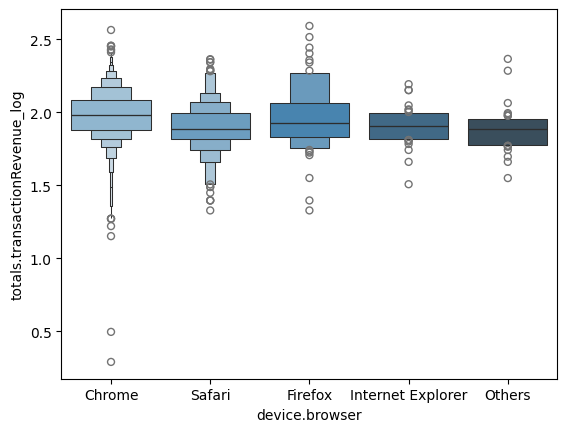

In [112]:
sns.boxenplot(
    data=df[df['visitWithTransaction'] == 1],
    x='device.browser',
    y=TARGET_LOG,
    palette='Blues_d'
)

In [113]:
def explore_cat_values(dataframe, column, target_column):
    _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])
    _results_df.columns = ['transactions', 'mean_revenue_ln','median_value','25pct_value','75pct_value']
    _results_df['n_rows'] = dataframe[column].value_counts(dropna=False)
    _results_df['pct_rows'] = dataframe[column].value_counts(normalize=True, dropna=False)
    _results_df['pct_transactions'] = _results_df['transactions'] / _results_df['n_rows']
    _results_df = _results_df[['n_rows', 'pct_rows', 'transactions', 'pct_transactions', 'mean_revenue_ln','25pct_value','median_value','75pct_value']]
    return round(_results_df,3)

    ##Reutilizar para variables categoricas.

In [115]:
explore_cat_values(df, 'device.browser', TARGET_LOG)


<ipython-input-113-b36dfd25180b>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])
<ipython-input-113-b36dfd25180b>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])
<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided ca

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
device.browser,,,,,,,,
Chrome,186001,0.687,3084,0.017,1.983,1.881,1.982,2.082
Safari,54676,0.202,232,0.004,1.898,1.815,1.883,1.992
Firefox,11052,0.041,52,0.005,1.957,1.828,1.925,2.061
Internet Explorer,5838,0.022,29,0.005,1.908,1.819,1.908,1.992
Others,13283,0.049,28,0.002,1.886,1.773,1.886,1.955


In [119]:
def setOthers(dataframe, colum, num_values):
    top_categories = dataframe[colum].value_counts().head(num_values)
    top_categories_list = top_browsers.index.tolist()
    top_categories_list.append('Others')
    dataframe[colum]=pd.Categorical(dataframe[colum], categories=top_categories_list, )
    return dataframe.fillna({colum: 'Others'})

Divice channelGrouping

In [121]:
explore_cat_values(df, 'channelGrouping', TARGET_LOG)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])


,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
channelGrouping,,,,,,,,
Direct,42746,0.158,584,0.014,2.011,1.905,2.001,2.150
Display,1912,0.007,44,0.023,2.047,1.919,2.036,2.161
Organic Search,114313,0.422,1058,0.009,1.936,1.833,1.930,2.039
Paid Search,7662,0.028,140,0.018,1.953,1.859,1.952,2.063
Referral,31490,0.116,1574,0.050,1.989,1.897,1.988,2.082
Social,67780,0.250,25,0.000,1.905,1.849,1.920,2.016


Dive Category

In [122]:
explore_cat_values(df, 'device.deviceCategory', TARGET_LOG)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])


,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
device.deviceCategory,,,,,,,,
desktop,199269,0.736,3141,0.016,1.984,1.881,1.982,2.082
mobile,62541,0.231,244,0.004,1.867,1.782,1.876,1.976
tablet,9040,0.033,40,0.004,1.936,1.856,1.903,2.042


Device IsMobiel

In [123]:
explore_cat_values(df, 'device.isMobile', TARGET_LOG)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])


,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
device.isMobile,,,,,,,,
False,199280,0.736,3141,0.016,1.984,1.881,1.982,2.082
True,71570,0.264,284,0.004,1.876,1.815,1.879,1.985


In [127]:
device_tab=pd.crosstab(df['device.isMobile'], df['device.deviceCategory'])

In [128]:
device_tab

device.deviceCategory,desktop,mobile,tablet
device.isMobile,,,
False,199239,38,3
True,30,62503,9037


In [139]:
prob_desktop = (device_tab.iloc[0,0] + device_tab.iloc[1,0]) / df.shape[0]
prob_dektop

,0
device.deviceCategory,
desktop,0.735717
mobile,0.230906
tablet,0.033376


In [140]:
prob_isMobile = (device_tab.iloc[1,0] + device_tab.iloc[1,1]+ device_tab.iloc[1,2]) / df.shape[0]
prob_isMobile

0.2642422004799705

In [141]:
prob_desktop*prob_isMobile*df.shape[0]
#probabilidad q pasa esto

52655.27904744324

In [144]:
stat, p_value, dof, expected = chi2_contingency(device_tab)
#prueba de independencia Chi-cuadrado entre las variables representadas en la tabla de contingencia

In [145]:
expected

array([[146613.72095256,  46015.02853978,   6651.25050766],
       [ 52655.27904744,  16525.97146022,   2388.74949234]])

GeoNetwork continen

In [147]:
explore_cat_values(df,'geoNetwork.continent', TARGET_LOG)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])


,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
geoNetwork.continent,,,,,,,,
Africa,4461,0.016,2,0.000,2.384,2.382,2.384,2.387
Americas,134742,0.497,3359,0.025,1.974,1.871,1.971,2.075
Asia,67195,0.248,37,0.001,2.012,1.913,1.992,2.098
Europe,59398,0.219,23,0.000,1.993,1.886,1.992,2.068
Oceania,4601,0.017,4,0.001,2.057,1.968,2.019,2.109


# SubContinene

In [149]:
explore_cat_values(df,'geoNetwork.subContinent', TARGET_LOG)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])


,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
geoNetwork.subContinent,,,,,,,,
Australasia,4565,0.017,4,0.001,2.057,1.968,2.019,2.109
Caribbean,745,0.003,7,0.009,1.943,1.852,1.957,1.996
Central America,4772,0.018,4,0.001,1.923,1.878,1.966,2.011
Eastern Africa,566,0.002,1,0.002,2.389,2.389,2.389,2.389
Eastern Asia,13910,0.051,19,0.001,2.017,1.935,1.989,2.070
Eastern Europe,13645,0.050,5,0.000,1.937,1.893,1.961,1.990
Northern America,116667,0.431,3314,0.028,1.974,1.869,1.970,2.075
Northern Europe,17438,0.064,7,0.000,2.000,1.870,2.007,2.126
South America,12558,0.046,34,0.003,2.014,1.990,2.063,2.112


Country

In [150]:
explore_cat_values(df,'geoNetwork.country', TARGET_LOG)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])


,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
geoNetwork.country,,,,,,,,
Australia,3866,0.014,3,0.001,2.086,2.013,2.068,2.149
Belgium,1244,0.005,2,0.002,2.118,2.079,2.118,2.158
Brazil,5931,0.022,4,0.001,1.905,1.807,2.028,2.126
Canada,7696,0.028,51,0.007,1.988,1.815,1.926,2.163
Chile,594,0.002,1,0.002,1.721,1.721,1.721,1.721
Colombia,1491,0.006,3,0.002,1.958,1.914,1.923,1.984
Czechia,1321,0.005,1,0.001,1.961,1.961,1.961,1.961
Ecuador,389,0.001,1,0.003,2.076,2.076,2.076,2.076
France,4780,0.018,1,0.000,2.179,2.179,2.179,2.179


In [154]:
results_by_country=explore_cat_values(df,'geoNetwork.country', TARGET_LOG)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])


In [161]:
last_countries = results_by_country[results_by_country['n_rows'] > 500].sort_values(by='mean_revenue_ln').head().index.to_list()
last_countries

['Chile', 'Turkey', 'Ireland', 'Netherlands', 'Russia']

In [160]:
first_countries = results_by_country[results_by_country['n_rows'] > 500].sort_values(by='mean_revenue_ln').tail().index.to_list()
first_countries

['Australia', 'United Kingdom', 'Indonesia', 'Belgium', 'France']

In [163]:
country_list = last_countries +first_countries
country_list

['Chile',
 'Turkey',
 'Ireland',
 'Netherlands',
 'Russia',
 'Australia',
 'United Kingdom',
 'Indonesia',
 'Belgium',
 'France']

In [170]:
TARGET_LN = 'totals.transactionRevenue_log'  # Asegúrate de que esta columna exista

In [176]:
def setOthersminmax(dataframe, column, target_column, num_rows_min, top_n):
    results_by_category = explore_cat_values(dataframe, column, target_column)
    last_categories = results_by_category[results_by_category['n_rows'] > num_rows_min].sort_values(by='mean_revenue_ln').head(top_n).index.to_list()
    first_categories = results_by_category[results_by_category['n_rows'] > num_rows_min].sort_values(by='mean_revenue_ln').tail(top_n).index.to_list()
    top_categories_list = first_categories + last_categories
    top_categories_list.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('Others')

In [181]:
setOthersminmax(df, 'geoNetwork.country', TARGET_LOG, 500, 3)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])
<ipython-input-113-b36dfd25180b>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])
<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided ca

IndexError: index -1 is out of bounds for axis 0 with size 0

NetWork domain

In [182]:
df['geoNetwork.networkDomain'].describe()

,geoNetwork.networkDomain
count,270850
unique,14299
top,(not set)
freq,72734


In [183]:
df['geoNetwork.networkDomain'].value_counts().head(20)

,count
geoNetwork.networkDomain,
(not set),72734
unknown.unknown,43658
comcast.net,8678
rr.com,4411
verizon.net,4061
ttnet.com.tr,4013
comcastbusiness.net,2971
hinet.net,2360
virginm.net,1931


In [186]:
df['network_net']=df['geoNetwork.networkDomain'].str.contains('.net',case=False).astype(int)

In [191]:
df['network_com']=df['geoNetwork.networkDomain'].str.contains('.con',case=False).astype(int)

In [192]:
explore_cat_values(df,'network_net', TARGET_LOG)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])


,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
network_net,,,,,,,,
0,269370,0.995,3423,0.013,1.975,1.873,1.971,2.075
1,1480,0.005,2,0.001,2.192,2.155,2.192,2.229


In [193]:
explore_cat_values(df,'network_com', TARGET_LOG)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])


,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
network_com,,,,,,,,
0,269370,0.995,3423,0.013,1.975,1.873,1.971,2.075
1,1480,0.005,2,0.001,2.192,2.155,2.192,2.229


Fecha VisitStartime

In [194]:
df['visitStartTime'].head()

,visitStartTime
0,1472880147
1,1472865386
2,1472881213
3,1472812602
4,1472812272


In [195]:
datetime.fromtimestamp(1514764800).hour

0

In [197]:
#datetime tiene menos attributos: no hay quarter, week,...
df['visitHour'] = df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).hour)
df['year'] = df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).year)
df['month'] = df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).month)
df['day'] = df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).day)

In [198]:
explore_cat_values(df, 'visitHour', TARGET_LN)

<ipython-input-113-b36dfd25180b>:2: FutureWarning: The provided callable <function mean at 0x7e75ab13e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])


,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
visitHour,,,,,,,,
0,10123,0.037,131,0.013,1.950,1.864,1.961,2.019
1,9682,0.036,167,0.017,1.982,1.886,1.987,2.077
2,9594,0.035,152,0.016,1.955,1.862,1.937,2.033
3,9420,0.035,119,0.013,1.911,1.829,1.920,2.001
4,9019,0.033,116,0.013,1.946,1.855,1.954,2.039
5,8957,0.033,81,0.009,1.926,1.821,1.938,2.014
6,8795,0.032,29,0.003,2.012,1.893,1.994,2.126
7,9307,0.034,40,0.004,1.950,1.858,1.991,2.069
8,9155,0.034,24,0.003,1.944,1.862,1.948,2.045


In [199]:
df.drop('visitStartTime', axis=1, inplace=True)

In [200]:
df['visitNumber'].describe()

,visitNumber
count,270850.000000
mean,2.243275
std,8.912507
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,393.000000


<Axes: xlabel='visitNumber', ylabel='totals.transactionRevenue_log'>

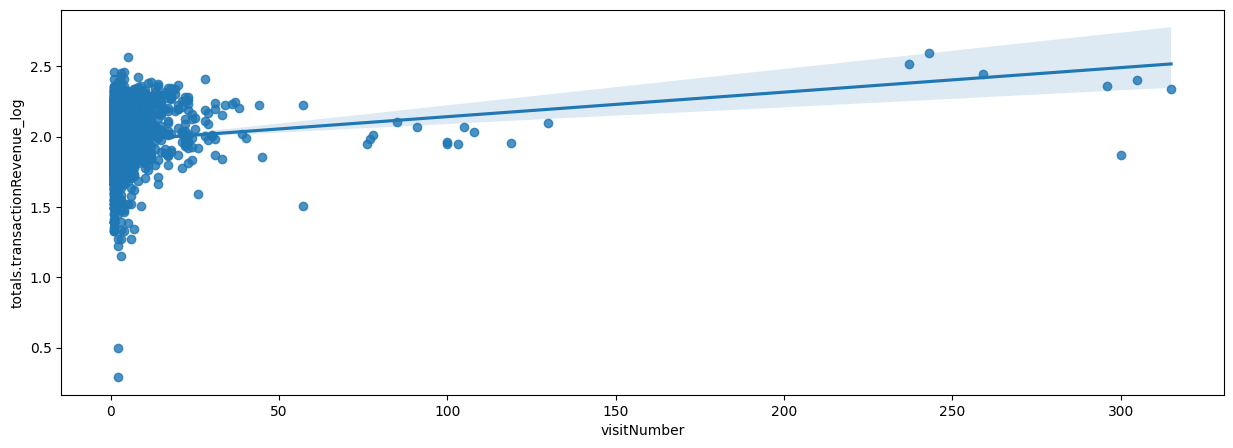

In [201]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df[df['visitWithTransaction'] == 1],
    x='visitNumber',
    y=TARGET_LN
)

In [202]:
df[['visitNumber', TARGET_LN]].corr()

,visitNumber,totals.transactionRevenue_log
visitNumber,1.000000,0.028706
totals.transactionRevenue_log,0.028706,1.000000


In [203]:
df[['visitNumber', TARGET_LOG]].corr(method='spearman')

,visitNumber,totals.transactionRevenue_log
visitNumber,1.00000,0.10936
totals.transactionRevenue_log,0.10936,1.00000


In [207]:
df['visitNumberLog']=df['visitNumber'].apply(np.log1p)

In [208]:
df[['visitNumberLog', TARGET_LOG]].corr(method = 'pearson')

,visitNumberLog,totals.transactionRevenue_log
visitNumberLog,1.000000,0.101883
totals.transactionRevenue_log,0.101883,1.000000
